# **Νευρωνικά Δίκτυα και Ευφυή Υπολογιστικά Συστήματα**

### **Άσκηση 1. Επιβλεπόμενη Μάθηση: Ταξινόμηση. Μελέτη datasets του UCI Machine Learning Repository**
##### Μαρίνος Τζανίκος 03113147, el13147@mail.ntua.gr
##### Γιώργος Γκανάς 03116095, el16095@mail.ntua.gr
##### Παναγιώτης Αϊβασιλιώτης 03116176, el16176@mail.ntua.gr

#### **Βασικές πληροφορίες**

**Εισαγωγή του dataset**

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("crx.data", header=None)
#Show the first 5 samples of the dataframe
df.head(n=5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


**Παρουσίαση του dataset**

To dataset περιγράφει την έκβαση των αιτήσεων για πιστωτικές κάρτες με βάση κάποια χαρακτηριστικά.Δηλαδή αν η αίτηση κάποιου για πιστωτική κάρτα, εγκρίθηκε ή όχι.Στόχος μας είναι με χρήση επιβλεπόμενης μάθησης και χωρίς να ξέρουμε την πραγματική ερμηνεία των δεδομένων να δημιουργήσουμε ένα συστήμα που θα μπορεί να χαρακτηρίζει όσο το δυνατόν καλύτερα αν η έκβαση μίας υποψηφίας αίτησης θα είναι θετική ή αρνητική.

**Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών. Υπάρχουν μη διατεταγμένα χαρακτηριστικά και ποια είναι αυτά;**

Το dataset περιέχει 690 δείγματα.Kάθε δείγμα αποτελείται από 15 χαρακτηριστικά τα οποία είναι κατηγορικά ή αριθμητικά και των οποίων η πραγματική ερμηνεία δεν μας δίνεται.Τα διατεταγμένα χαρακτηριστικά είναι μόνο τα αριθμητικά.Ακόμα κάθε δείγμα περιέχει μία ετικέτα που μας δείχνει την έκβαση που είχε η εν λόγω αίτηση.Πιο συγκεκριμένα έχουμε τα εξής σχετικά με τις πληροφορίες που περιέχει ένα δείγμα:

A1:	b, a.  
A2:	continuous.  
A3:	continuous.  
A4:	u, y, l, t.  
A5:	g, p, gg.  
A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.  
A7:	v, h, bb, j, n, z, dd, ff, o.  
A8:	continuous.  
A9: t, f.  
A10: t, f.  
A11: continuous.  
A12: t, f.  
A13: g, p, s.  
A14: continuous.  
A15: continuous.  
A16: +,- (class attribute)

Επομένως έχουμε οτι τα χαρακτηριστικά Α2,Α3,Α8,Α11,Α14,Α15 είναι συνεχή και τα υπόλοιπα 10 κατηγορικά.

**Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών;**

Όχι, τα δεδομένα μας βρίσκονται σε raw μορφή μέσα στο αρχείο και επομένως δεν έχουν ούτε επικεφαλίδες ούτε αρίθμηση γραμμών.

**Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολόνα βρίσκονται;**

Οι ετικέτες των κλάσεων βρίσκονται στην 16η κολόνα και είναι είτε "+" δηλαδή θετική έκβαση της αίτησης είτε "-" δηλαδή αρνητική έκβαση της αίτησης.

In [3]:
unique_labels = df.iloc[:,-1].unique()
print("Unique labels of samples: {0}".format(unique_labels))

Unique labels of samples: ['+' '-']


**Χρειάστηκε να κάνετε μετατροπές στα αρχεία text και ποιες?**

Οχι δεν χρειάστηκε να γίνει κάποια μετατροπή στα αρχεία text.Ωστόσο κρίθηκε απαραίτητο να γίνει μία κωδικοποίηση των ετικετών κλάσης από -,+ σε 0,1 ώστε τα δεδομένα μας να είναι συμβατά με το scikit-learn.

In [4]:
labels_df = df.iloc[:,-1] # labels in the last column
features_df = df.iloc[:,:-1] # features in all columns but the last

mapping = {'-' : 0, '+' : 1} # mapping for labels
labels_df = labels_df.replace(mapping)

**Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου;**

Παρατηρούμε ότι οι απουσιάζουσες τιμές εμφανίζονται με "?" μέσα στο αρχείο εισόδου και δεν υπάρχει καμία απουσιάζουσα ετικέτα.

In [5]:
df.replace('?', np.NaN, inplace=True) # replace all ? with np.NaN


In [6]:
df.isnull().sum().sum() # how many missing values we have

67

In [7]:
sum([True for idx,row in df.iterrows() if any(row.isnull())]) # how many samples have missing values

37

Επομένως υπάρχουν συνολικά 67 απουσιάζουσες τιμές σε 37 εκ των δειγμάτων, που αντιστοιχούν στο 5,3% του συνόλου.

**Ποιος είναι ο αριθμός των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου; Αν θεωρήσουμε ότι ένα dataset είναι μη ισορροπημένο αν μια οποιαδήποτε κλάση είναι 1.5 φορά πιο συχνή από κάποια άλλη (60%-40% σε binary datasets) εκτιμήστε την ισορροπία του dataset.**

In [8]:
np_labels = labels_df.values.flatten() # convert labels dataframe to numpy array
frequencies = np.bincount(np_labels)
total_samples = np_labels.shape[0]
percentages = (frequencies / total_samples) * 100

print("Class frequencies: {0}".format(frequencies))

print("Class percentages: {0}".format(percentages))

Class frequencies: [383 307]
Class percentages: [55.50724638 44.49275362]


Βλέπουμε ότι τα ποσοστά δειγμάτων επί του συνόλου των δύο κλάσεων βρίσκονται κοντά στο 50%, επομένως το dataset είναι ισορροπημένο.

**Διαχωρίστε σε train και test set. Εάν υπάρχουν απουσιάζουσες τιμές και μη διατεταγμένα
χαρακτηριστικά διαχειριστείτε τα και αιτιολογήστε τις επιλογές σας.**

Αφού χωρίσουμε το dataset σε train και test set θα αντικαταστήσουμε τις απουσιάζουσες τιμές καθώς η είσοδος στους αλγορίθμους μηχανικής μάθησης πρέπει να είναι πλήρης.Για το λόγο αυτόν,
Θα χρησιμοποιήσουμε το μετασχηματιστή “Imputer” του scikit learn που αντικαθιστά κάθε απουσιάζουσα τιμή χαρακτηριστικού με τη μέση τιμή (συνεχείς μεταβλητές) ή την πιο συχνή τιμή (κατηγορικές μεταβλητές).
Ο μετασχηματισμός με Imputer γίνεται στην απόλυτη αρχή της προεπεξεργασίας.
Ακόμα πρέπει να

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#Split our dataframe intο train and test set
trainData, testData, trainLabels, testLabels = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=40)

#Split dataframes into categorical and continuous features dataframes
trainData_continuous = trainData.drop([0,3,4,5,6,8,9,11,12], axis=1)
trainData_categorical = trainData.drop([1,2,7,10,13,14], axis=1)
testData_continuous = testData.drop([0,3,4,5,6,8,9,11,12], axis=1)
testData_categorical = testData.drop([1,2,7,10,13,14], axis=1)

#Impute the missing values on continuous features
imp = SimpleImputer(missing_values=np.NaN,strategy='mean')
itrainData_continuous = pd.DataFrame(imp.fit_transform(trainData_continuous))
itrainData_continuous.columns=[1,2,7,10,13,14]
itestData_continuous = pd.DataFrame(imp.fit_transform(testData_continuous))
itestData_continuous.columns=[1,2,7,10,13,14]

#Impute the missing values on categorical features
imp = SimpleImputer(missing_values=np.NaN, strategy="most_frequent")
itrainData_categorical = pd.DataFrame(imp.fit_transform(trainData_categorical))
itrainData_categorical.columns=[0,3,4,5,6,8,9,11,12]
itestData_categorical = pd.DataFrame(imp.fit_transform(testData_categorical))
itestData_categorical.columns=[0,3,4,5,6,8,9,11,12]

#Merge dataframes and reorder indexes to form the original ones imputed
itrainData = pd.concat([itrainData_categorical, itrainData_continuous], axis=1)
itrainData = itrainData.reindex(sorted(itrainData.columns), axis=1)

itestData = pd.concat([itestData_categorical, itestData_continuous], axis=1)
itestData = itestData.reindex(sorted(itestData.columns), axis=1)

#Convert categorical features to binary , we have to join the two data before this step
Data_dummies = pd.get_dummies(pd.concat([itrainData,itestData], join="outer", axis=0),columns=[0,3,4,5,6,8,9,11,12])
trainData_dummies = Data_dummies.iloc[:itrainData.shape[0],:]
testData_dummies = Data_dummies.iloc[itrainData.shape[0]:,:]

#Convert to numeric values and numpy arrays, using symbolic names
X_train = trainData_dummies.apply(pd.to_numeric).values
X_test = testData_dummies.apply(pd.to_numeric).values
Y_train = trainLabels.values.flatten()
Y_test =  testLabels.values.flatten()

#### **Baseline classification** 

In [10]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_minus = DummyClassifier(strategy="constant", constant="-")
dc_constant_plus = DummyClassifier(strategy="constant", constant="+")
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

dc_uniform.fit(X_train, y_train)
dc_constant_minus.fit(X_train, y_train)
dc_constant_plus.fit(X_train, y_train)
dc_most_frequent.fit(X_train, y_train)
dc_stratified.fit(X_train, y_train)

pred_uni = dc_uniform.predict(X_test)
pred_const_minus = dc_constant_minus.predict(X_test)
pred_const_plus = dc_constant_plus.predict(X_test)
pred_freq = dc_most_frequent.predict(X_test)
pred_strat = dc_stratified.predict(X_test)

print("The DummyClassifier with uniform strategy: \n" + fscore_report(y_test,pred_uni))
print("The DummyClassifier with constant minus strategy: \n" + fscore_report(y_test,pred_const_minus))
print("The DummyClassifier with constant plus strategy: \n" + fscore_report(y_test,pred_const_plus))
print("The DummyClassifier with frequent strategy: \n" + fscore_report(y_test,pred_freq))
print("The DummyClassifier with stratified strategy: \n" + fscore_report(y_test,pred_strat))

ImportError: No module named 'sklearn'

In [40]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred_gnb = gnb.predict(X_test)

print("The GaussianNB Classifier: \n" + fscore_report(y_test,pred_gnb))

The GaussianNB Classifier: 
[Micro] Precision: 0.82 Recall: 0.82, F1: 0.82 
[Macro] Precision: 0.82 Recall: 0.81, F1: 0.82



In [37]:
from sklearn.neighbors import KNeighborsClassifier

# kNN Classifier, default k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

print("The KNeighborsClassifier with n_neighbors=5: \n" + fscore_report(y_test,pred_knn))

The KNeighborsClassifier with n_neighbors=5: 
[Micro] Precision: 0.67 Recall: 0.67, F1: 0.67 
[Macro] Precision: 0.68 Recall: 0.67, F1: 0.67



In [33]:
from sklearn.metrics import precision_recall_fscore_support

def fscore_report(y_test, y_pred):
  #f1 micro
  precision_micro = precision_recall_fscore_support(y_test, y_pred, average='micro')[0]
  recall_micro = precision_recall_fscore_support(y_test, y_pred, average='micro')[1]
  f1_micro = precision_recall_fscore_support(y_test, y_pred, average='micro')[2]
  #f1 macro
  precision_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')[0]
  recall_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')[1]
  f1_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')[2]
  return ("[Micro] Precision: {0} Recall: {1}, F1: {2} \n[Macro] Precision: {3} Recall: {4}, F1: {5}\n".format(round(precision_micro,2), round(recall_micro,2), round(f1_micro,2), round(precision_macro,2), round(recall_macro,2), round(f1_macro,2)))

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

def plot_cnf_clfs(clfs, X_test, y_test, classes):
  fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
  for clf, ax in zip(clfs, axes.flatten()):
    split_title = str(clf).replace(")", "").split("(")
    clf_name = split_title[0]

    if (clf_name == "DummyClassifier"):
        clf_title = clf_name + split_title[1].split(",")[2]
    elif (clf_name == "GNB......"):
        clf_title = clf_name
    elif (clf_name == "KNeighborsClassifier"):
        clf_title = clf_name + split_title[1].split(",")[5]

    disp = plot_confusion_matrix(clf, X_test, y_test,display_labels=classes,cmap=plt.cm.Blues,normalize=None,ax=ax)
    disp.ax_.set_title(clf_title)
  plt.tight_layout()
  plt.show(disp)

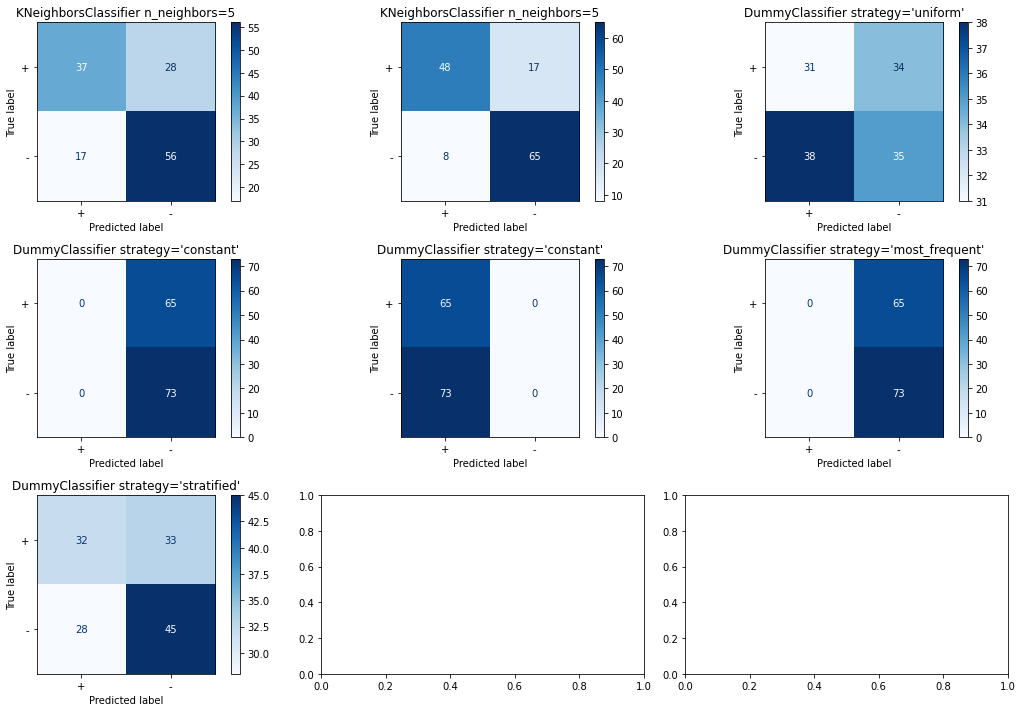

In [43]:
clfs = [knn,gnb,dc_uniform, dc_constant_minus, dc_constant_plus, dc_most_frequent, dc_stratified]
plot_cnf_clfs(clfs,X_test, y_test,["+", "-"])

#### **Optimisation**

In [9]:
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()

pipe_uniform = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca)\
                               , ('dc_uniform', dc_uniform)])
pipe_constant_minus = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca)\
                                      , ('dc_constant_minus', dc_constant_minus)])
pipe_constant_plus = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca)\
                                     , ('dc_constant_plus', dc_constant_plus)])
pipe_most_frequent = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca)\
                               , ('dc_most_frequent', dc_most_frequent)])
pipe_stratified = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca)\
                               , ('dc_stratified', dc_stratified)])

ImportError: No module named 'sklearn'